<a href="https://colab.research.google.com/github/amanjaiswalofficial/machine-learning-engineer-projects/blob/main/HOML/03_Feature_Correlations_via_Visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import mutual_info_regression
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import fetch_california_housing

# Load dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target  # Add target variable

# Show first few rows
print(df.head())


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  


In [ ]:
# Split data
X = df.drop(columns=['target'])
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a baseline model
baseline_model = LinearRegression()
baseline_model.fit(X_train, y_train)

# Predictions
y_pred = baseline_model.predict(X_test)

# Evaluation
print("Baseline Model Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


Baseline Model Performance:
MAE: 0.5332001304956553
RMSE: 0.7455813830127764


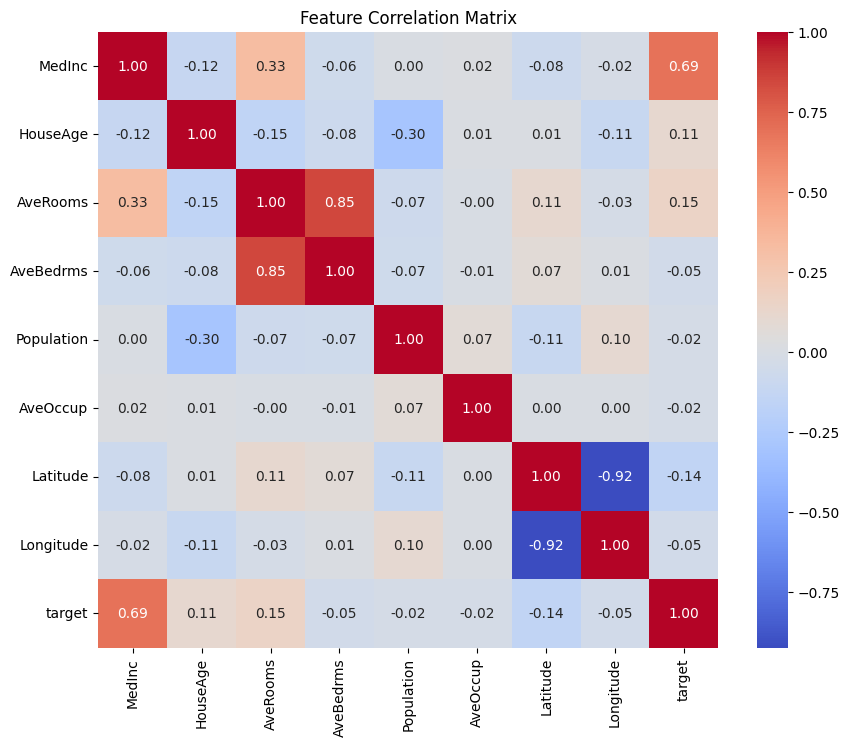

In [ ]:
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

1. MedInc has high correlation with target
2. AvgRooms, AveBedrms has very little correlation with target
3. Latitude and Longitude have complex relationship with target

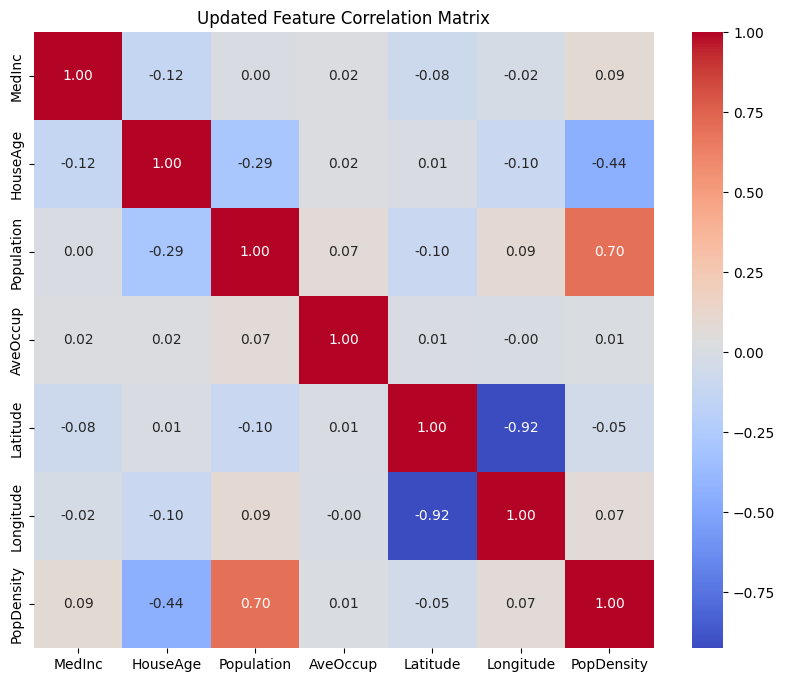

In [ ]:
# Drop weak features
X_train = X_train.drop(columns=['AveRooms', 'AveBedrms'])
X_test = X_test.drop(columns=['AveRooms', 'AveBedrms'])

# Create a new feature: Population Density
X_train['PopDensity'] = X_train['Population'] / X_train['HouseAge']
X_test['PopDensity'] = X_test['Population'] / X_test['HouseAge']

# Check correlation again
plt.figure(figsize=(10, 8))
sns.heatmap(X_train.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Updated Feature Correlation Matrix")
plt.show()


In [ ]:
# Train improved model
improved_model = RandomForestRegressor(n_estimators=100, random_state=42)
improved_model.fit(X_train, y_train)

# Predictions
y_pred_improved = improved_model.predict(X_test)

# Evaluation
print("Improved Model Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_improved))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_improved)))


Improved Model Performance:
MAE: 0.32812287868217066
RMSE: 0.5117686202581865


In [ ]:
print("Baseline Model:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

print("\nImproved Model:")
print("MAE:", mean_absolute_error(y_test, y_pred_improved))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_improved)))


Baseline Model:
MAE: 0.5332001304956553
RMSE: 0.7455813830127764

Improved Model:
MAE: 0.32812287868217066
RMSE: 0.5117686202581865


**Why Linear Regression Performed Poorly?**

Linear Assumptions:

Linear Regression assumes a linear relationship between features and the target.

But in real-world housing prices, relationships are often non-linear (e.g., income vs. price isn't a straight line).

Feature Importance & Interaction:

Some features might interact in complex ways (e.g., population and house age affecting prices differently in different locations).

Linear Regression doesn’t handle feature interactions well unless we manually add polynomial terms.

Handling Outliers & Non-Normal Data:

Linear Regression is sensitive to outliers and skewed distributions.

Housing prices often have non-normal distributions, which can distort predictions.

**Why Random Forest Works Better?**

Handles Non-Linearity:

Decision Trees (which make up a Random Forest) can model complex relationships without assuming a linear pattern.

For example, house prices may increase with income but flatten out at high incomes—a non-linear effect.

Automatic Feature Selection:

Random Forest naturally assigns importance to features and ignores weak ones.
No need to manually remove weak features—Random Forest can learn feature importance automatically.

Handles Outliers & Missing Data Better:

Random Forest is robust to outliers because it splits the data into many decision trees.
It also handles missing values well (though our dataset didn’t have many).

Better Generalization:

Random Forest reduces overfitting by averaging multiple trees.
This makes it more robust than a single Decision Tree.

### Feature by feature analysis

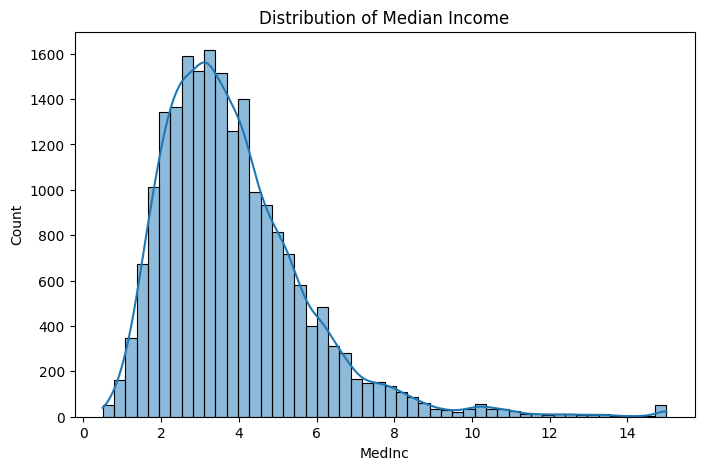

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df['MedInc'], bins=50, kde=True)
plt.title("Distribution of Median Income")
plt.show()

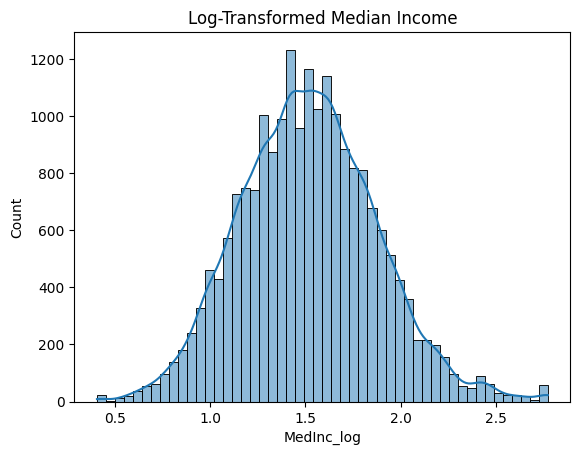

In [ ]:
df['MedInc_log'] = np.log1p(df['MedInc'])  # log(1 + x) to avoid log(0)
sns.histplot(df['MedInc_log'], bins=50, kde=True)
plt.title("Log-Transformed Median Income")
plt.show()

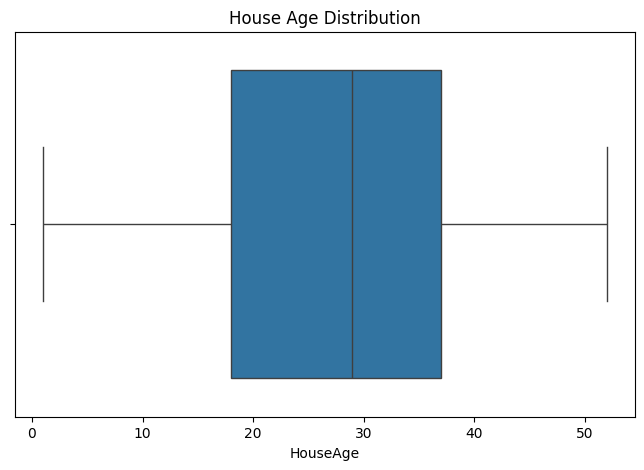

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['HouseAge'])
plt.title("House Age Distribution")
plt.show()

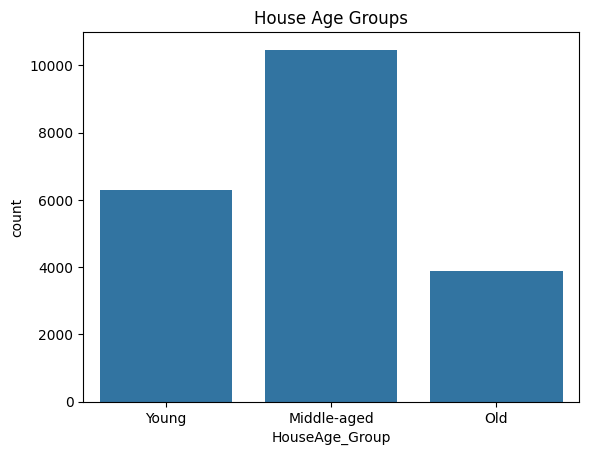

In [ ]:
df['HouseAge_Group'] = pd.cut(df['HouseAge'], bins=[0, 20, 40, 60], labels=['Young', 'Middle-aged', 'Old'])
sns.countplot(x=df['HouseAge_Group'])
plt.title("House Age Groups")
plt.show()


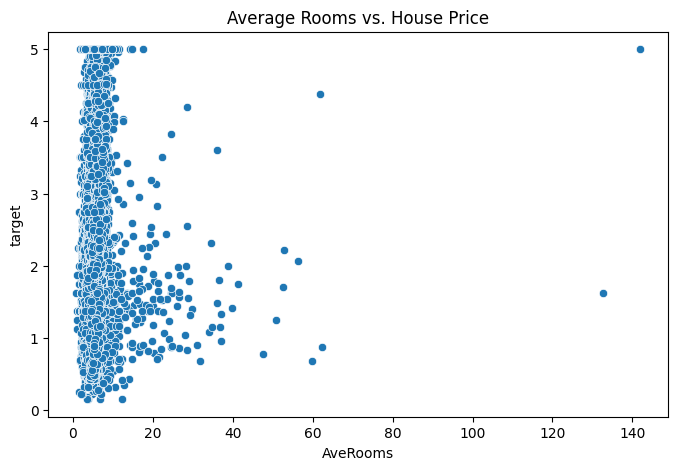

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['AveRooms'], y=df['target'])
plt.title("Average Rooms vs. House Price")
plt.show()


In [ ]:
df['AveRooms_clipped'] = np.clip(df['AveRooms'], a_min=1, a_max=10)


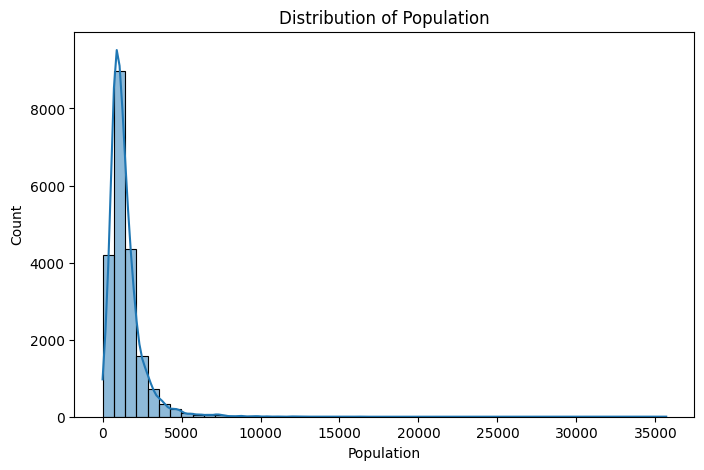

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Population'], bins=50, kde=True)
plt.title("Distribution of Population")
plt.show()


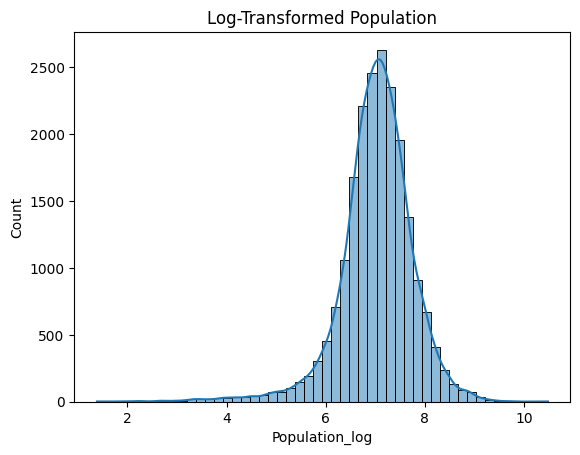

In [ ]:
df['Population_log'] = np.log1p(df['Population'])
sns.histplot(df['Population_log'], bins=50, kde=True)
plt.title("Log-Transformed Population")
plt.show()


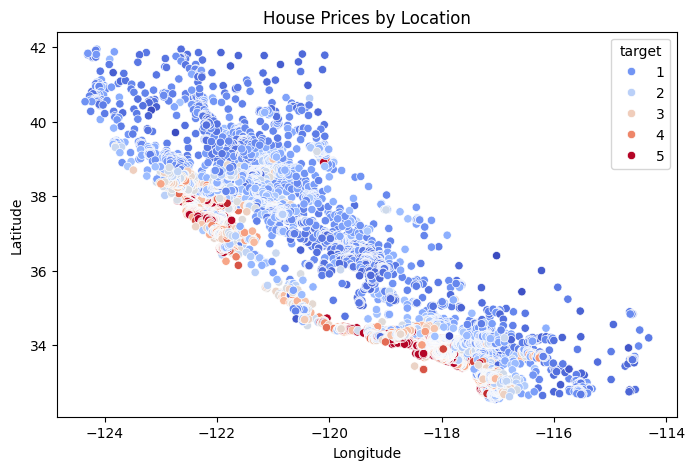

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Longitude'], y=df['Latitude'], hue=df['target'], palette="coolwarm")
plt.title("House Prices by Location")
plt.show()


In [ ]:
from sklearn.cluster import KMeans

# Create 5 location-based clusters
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df['LocationCluster'] = kmeans.fit_predict(df[['Latitude', 'Longitude']])


In [ ]:
# Drop unnecessary features
X = df.drop(columns=['target', 'AveRooms', 'Population', 'HouseAge', 'MedInc'])

# Convert categorical features
X = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an improved Random Forest
final_model = RandomForestRegressor(n_estimators=200, random_state=42)
final_model.fit(X_train, y_train)

# Predictions
y_pred_final = final_model.predict(X_test)

# Evaluation
print("Final Model Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_final))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_final)))


Final Model Performance:
MAE: 0.32249729024951573
RMSE: 0.49393951379711143


### Feature transformations: What and why?

1. Issue: `MedInc` is right-skewed, meaning most values are small, but a few extreme values (outliers) are very large.
2. Effect on Model: Linear models (like regression) assume a normal distribution of features. If a feature is skewed, it can have a disproportionate impact on predictions.
3. Solution: Apply log transformation (log(1 + x)) to compress large values and make the distribution more normal.
4. Old feature: [0.5, 1.0, 2.0, 3.5, 5.0, 10.0, 15.0, 50.0]
5. New feature: [0.4, 0.69, 1.10, 1.50, 1.79, 2.40, 2.77, 3.93]
---
1. Issue: Some houses had 20+ rooms, which are extreme and not representative of most homes.
2. Effect on Model: Outliers distort the scale of features, making the model give too much weight to extreme cases.
3. Solution: Clip the values so they stay within a reasonable range (e.g., 1 to 10).
4. Old, [3, 4, 5, 6, 8, 10, 12, 15, 20, 50]
5. New, [3, 4, 5, 6, 8, 10, 10, 10, 10, 10]
---
1. Issue: Some regions had huge populations, while most were much smaller (highly skewed).
2. Effect on Model: The model might give too much weight to regions with extreme population sizes.
3. Solution: Use a log transformation to bring extreme values closer to normal values.
4. Old, [500, 1000, 2000, 5000, 10000, 50000, 100000]
5. New, [6.21, 6.91, 7.60, 8.52, 9.21, 10.82, 11.51]
---
1. Issue: `HouseAge` is a continuous number, but it has a bimodal distribution (most houses are either very new or very old).
2. Effect on Model: Instead of treating house age as a smoothly increasing number, it makes more sense to group houses into age categories (young, middle-aged, old).
3. Solution: Convert it into bins (categories) and encode them as one-hot features.
4. Old, [5, 10, 15, 25, 35, 45, 55, 60]
5. New, ['Young', 'Young', 'Young', 'Middle-aged', 'Middle-aged', 'Old', 'Old', 'Old']
---
1. Issue: `Latitude` and `Longitude` are continuous variables, but houses in the same region tend to have similar prices.
2. Effect on Model: The model might struggle to learn location-based patterns if we treat latitude and longitude as just numbers.
3. Solution: Use K-Means clustering to group locations into regions and use those as categorical features.
4. Old, Latitude: [34.1, 34.2, 35.0, 36.0, 37.5, 38.2]
Longitude: [-118.3, -118.2, -120.0, -121.5, -122.0, -123.1]
5. New, [1, 1, 2, 3, 4, 4]

### Improving the model even further
1. Try with better features

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Perform Grid Search
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)

# Train model with best parameters
best_rf = RandomForestRegressor(**grid_search.best_params_, random_state=42)
best_rf.fit(X_train, y_train)

# Predictions
y_pred_best = best_rf.predict(X_test)

# Evaluation
print("Tuned Model Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_best))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_best)))

Fitting 3 folds for each of 162 candidates, totalling 486 fits
Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Tuned Model Performance:
MAE: 0.3180788898619189
RMSE: 0.4835260551080448


2. Feature Selection (Remove Weak Features)

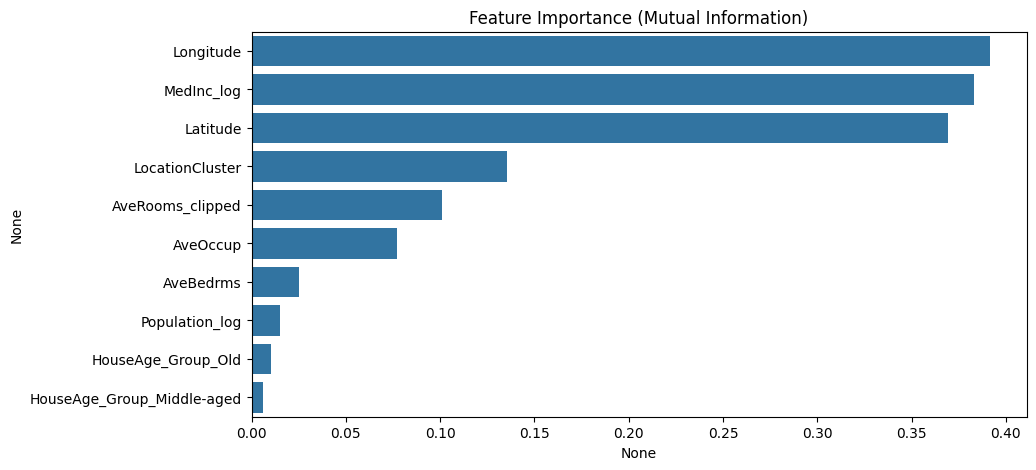

In [ ]:
from sklearn.feature_selection import mutual_info_regression

# Compute feature importance
mi_scores = mutual_info_regression(X_train, y_train)
mi_scores = pd.Series(mi_scores, index=X_train.columns).sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x=mi_scores, y=mi_scores.index)
plt.title("Feature Importance (Mutual Information)")
plt.show()

# Select the top features
important_features = mi_scores[mi_scores > 0.01].index  # Keep features with meaningful importance
X_train = X_train[important_features]
X_test = X_test[important_features]

3. More Feature Engineering

In [ ]:
df['BedRoomRatio'] = df['AveBedrms'] / df['AveRooms']
df['RoomsPerPerson'] = df['AveRooms'] / df['Population']
import xgboost as xgb

# Train XGBoost
xgb_model = xgb.XGBRegressor(n_estimators=300, learning_rate=0.05, max_depth=6, random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluation
print("XGBoost Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_xgb))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))


XGBoost Performance:
MAE: 0.31386340955673725
RMSE: 0.4758125396916461


4. Ensemble Learning

In [ ]:
from sklearn.ensemble import VotingRegressor

# Combine Random Forest and XGBoost
ensemble_model = VotingRegressor([
    ('rf', best_rf),
    ('xgb', xgb_model)
])

ensemble_model.fit(X_train, y_train)
y_pred_ensemble = ensemble_model.predict(X_test)

# Evaluation
print("Ensemble Model Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_ensemble))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ensemble)))


Ensemble Model Performance:
MAE: 0.31158370103839733
RMSE: 0.47615059066339005
